# Comparativo array 2D nativo do Python e o array 2D do Numpy

Neste notebook será realizado uma comparação entre as listas nativas do Python e o array provido pela biblioteca Numpy. A comparação será feita levando em consideração o consumo de tempo e memória das duas abordagens.

Vamos definir um conjunto de operações matriciais e implementá-las usando somente as instruções nativas do python e em seguida implementá-las utilizando a biblioteca Numpy, a fim de compará-las: 

- Cria um array NxN com valores aleatórios;
- Calcula a transposta;
- Multiplica a matriz com sua transposta;
- Soma a matriz original criada com o resultado da multiplicação anterior;
- Deleta 10% das linhas da matriz resultante;
- Converter o array 2D em 1D;
- Cria um array 1D aleatório de tamanho NxN;
- Calcula a diferença entre o array 2D convertido para 1D e o array aleatório criado 1D.

## Implementação das operações

### Python nativo

In [1]:
from random import randint

def python_createRandom2DArray(N):
  return [[randint(0, N) for x in range(N)] for y in range(N)]
  
def python_transposeArray(arr):
  return list(map(list, zip(*arr)))

def python_multArray(arr1, arr2):
  result_array = []
  for row in arr1:
      new_row = []
      for k in range(0, len(arr1)): 
          total = 0
          for j in range(0, len(arr2)): 
              total += arr2[j][k] * row[j]
          new_row.append(total)
      result_array.append(new_row)
  return result_array

def python_sumArray(arr1, arr2):
  return [[arr1[i][j] + arr2[i][j]  for j in range(len(arr1[0]))] for i in range(len(arr1))]

def python_deleteLastNRows(arr, number_of_rows):
  return arr[:-number_of_rows]

def python_flattenArray(arr):
  return [j for sub in arr for j in sub]

def python_createRandom1DArray(N):
  return [randint(0, N) for x in range(N)]

def python_diffArrays(arr1, arr2):
  return list(set(arr1).difference(set(arr2)))

### Numpy

In [5]:
import numpy as np

def numpy_createRandom2DArray(N):
  return np.random.randint(low=0, high=N, size=N*N).reshape(N, N)
 
def numpy_transposeArray(arr):
  return np.transpose(arr)

def numpy_multArray(arr1, arr2):
  return np.matmul(arr1, arr2)

def numpy_sumArray(arr1, arr2):
  return np.add(arr1, arr2)

def numpy_deleteLastNRows(arr, number_of_rows):
  return arr[:-number_of_rows, :]

def numpy_flattenArray(arr):
  return arr.flatten()

def numpy_createRandom1DArray(N):
  return np.random.randint(low=0, high=N, size=N)

def numpy_diffArrays(arr1, arr2):
  return np.setdiff1d(arr1, arr2)

## Benchmark

### Testando funções

Antes de ir propriamente para a execução da rotina de benchmark variando o tamanho da entrada, vamos antes testar nossas funções e ver se está tudo ok, com N = 2:

In [6]:
N = 2

py_array = python_createRandom2DArray(2)
np_array = np.array(py_array)
print(py_array)
print(np_array)

[[1, 0], [1, 1]]
[[1 0]
 [1 1]]


In [7]:
py_transpose = python_transposeArray(py_array)
np_transpose = numpy_transposeArray(np_array)

print(py_transpose)
print(np_transpose)

[[1, 1], [0, 1]]
[[1 1]
 [0 1]]


In [8]:
py_mult = python_multArray(py_array, py_transpose)
np_mult = numpy_multArray(np_array, np_transpose)

print(py_mult)
print(np_mult)

[[1, 1], [1, 2]]
[[1 1]
 [1 2]]


In [9]:
py_add = python_sumArray(py_array, py_mult)
np_add = numpy_sumArray(np_array, np_mult)

print(py_add)
print(np_add)

[[2, 1], [2, 3]]
[[2 1]
 [2 3]]


In [10]:
py_array_after_delete = python_deleteLastNRows(py_add, 1)
np_array_after_delete = numpy_deleteLastNRows(np_add, 1)

print(py_array_after_delete)
print(np_array_after_delete)

[[2, 1]]
[[2 1]]


In [11]:
py_flatten = python_flattenArray(py_array_after_delete)
np_flatten = numpy_flattenArray(np_array_after_delete)

print(py_flatten)
print(np_flatten)

[2, 1]
[2 1]


In [12]:
py_random_array1d = python_createRandom1DArray(N*N)
np_random_array1d = numpy_createRandom1DArray(N*N)

print(py_random_array1d)
print(np_random_array1d)

[0, 1, 2, 3]
[1 0 1 0]


In [13]:
py_diff = python_diffArrays(py_random_array1d, py_flatten)
np_diff = numpy_diffArrays(np_random_array1d, np_flatten)

print(py_diff)
print(np_diff)

[0, 3]
[0]


As operações implementadas está funcionando corretamente, podemos agora envolver todas as operações criadas em uma função única que chamaremos de função benchmark.

### Definindo a função benchmark

Vamos definir a função que irá calcular sequencialmente os métodos definidos anteriormente, e calcular o tempo gasto para executar cada um deles, bem como o tempo total para executar toda a função benchmark:

In [14]:
import time

# Python
def python_benchmark(N):

  time_elapsed = dict()

  start_benchmark = time.time()

  start_create2d = time.time()
  array = python_createRandom2DArray(N)
  time_elapsed['create2d'] = time.time() - start_create2d

  start_transpose = time.time()
  array_t = python_transposeArray(array)
  time_elapsed['tranpose'] = time.time() - start_transpose

  start_mult = time.time()
  array_mult = python_multArray(array, array_t)
  time_elapsed['mult'] = time.time() - start_mult

  start_sum = time.time()
  array_add = python_sumArray(array, array_mult)
  time_elapsed['sum'] = time.time() - start_sum

  start_delete = time.time()
  array_after_delete = python_deleteLastNRows(array_add, int(round(0.1*N)))
  time_elapsed['delete'] = time.time() - start_delete

  start_flatten = time.time()
  array_1d = python_flattenArray(array_after_delete)
  time_elapsed['flatten'] = time.time() - start_flatten

  start_create1d = time.time()
  random_array_1d = python_createRandom1DArray(N*N)
  time_elapsed['create1d'] = time.time() - start_create1d

  start_diff= time.time()
  array_diff = python_diffArrays(array_1d, random_array_1d)
  time_elapsed['diff'] = time.time() - start_diff

  time_elapsed['benchmark'] = time.time() - start_benchmark

  return time_elapsed

# Numpy
def numpy_benchmark(N):
  
  time_elapsed = dict()

  start_benchmark = time.time()

  start_create2d = time.time()
  array = numpy_createRandom2DArray(N)
  time_elapsed['create2d'] = time.time() - start_create2d

  start_transpose = time.time() 
  array_t = numpy_transposeArray(array)
  time_elapsed['tranpose'] = time.time() - start_transpose

  start_mult = time.time()
  array_mult = numpy_multArray(array, array_t)
  time_elapsed['mult'] = time.time() - start_mult

  start_sum = time.time()
  array_add = numpy_sumArray(array, array_mult)
  time_elapsed['sum'] = time.time() - start_sum

  start_delete = time.time()
  array_after_delete = numpy_deleteLastNRows(array_add, int(round(0.1*N)))
  time_elapsed['delete'] = time.time() - start_delete

  start_flatten = time.time()
  array_1d = numpy_flattenArray(array_after_delete)
  time_elapsed['flatten'] = time.time() - start_flatten

  start_create1d = time.time()
  random_array_1d = numpy_createRandom1DArray(N*N)
  time_elapsed['create1d'] = time.time() - start_create1d

  start_diff = time.time()
  array_diff = numpy_diffArrays(array_1d, random_array_1d)
  time_elapsed['diff'] = time.time() - start_diff

  time_elapsed['benchmark'] = time.time() - start_benchmark

  return time_elapsed



### Comparação de performance

Podemos agora, executar nossas duas funções benchmark variando o tamanho da entrada e armazenar o resultado para em seguida plotá-lo graficamente:

In [15]:
def calculate_dict_mean_values(arr):
  return {k: (arr[0].get(k, 0) + arr[1].get(k, 0) + arr[2].get(k, 0))/3 for k in set(arr[0]) | set(arr[1]) | set(arr[2])}

In [16]:
N = [10, 100, 1000]

python = dict()
numpy = dict()

for n in N:
  execution_time_python = []
  execution_time_numpy = []
  for i in range(3):
    execution_time_python.append(python_benchmark(n))
    execution_time_numpy.append(numpy_benchmark(n))
  python[n] = calculate_dict_mean_values(execution_time_python)
  numpy[n] = calculate_dict_mean_values(execution_time_numpy)

Preparando os dados para a plotagem:

In [17]:
from collections import defaultdict

def merge_dict_keys(dictionary):

    dd = defaultdict(list)

    for d in (dictionary[10], dictionary[100], dictionary[1000]): # you can list as many input dicts as you want here
        for key, value in d.items():
            dd[key].append(value)

    dd = dict(dd)

    return dd

In [18]:
python_results = merge_dict_keys(python)
numpy_results = merge_dict_keys(numpy)

print(python_results)
print(numpy_results)

{'create1d': [0.0006666978200276693, 0.02333354949951172, 2.2410600980122886], 'delete': [0.0, 0.0, 0.0], 'create2d': [0.00033291180928548175, 0.027660051981608074, 2.1179006894429526], 'benchmark': [0.0013326009114583333, 0.33663121859232586, 318.40001289049786], 'flatten': [0.0, 0.0, 0.06493910153706868], 'sum': [0.0, 0.003345648447672526, 0.30759119987487793], 'diff': [0.0, 0.0032994747161865234, 0.8461600144704183], 'tranpose': [0.0, 0.0, 0.10232933362325032], 'mult': [0.0003329912821451823, 0.278992493947347, 312.71970081329346]}
{'create1d': [0.0, 0.0006681283315022787, 0.01730497678120931], 'delete': [0.0, 0.0, 0.0003337860107421875], 'create2d': [0.0, 0.0, 0.00923482577006022], 'benchmark': [0.0, 0.004372358322143555, 2.619595686594645], 'flatten': [0.0, 0.0, 0.0013415018717447917], 'sum': [0.0, 0.0, 0.002651691436767578], 'diff': [0.0, 0.001374642054239909, 0.20135347048441568], 'tranpose': [0.0, 0.0, 0.0], 'mult': [0.0, 0.002329587936401367, 2.3873754342397056]}


Vamos então plotar os gráficos:

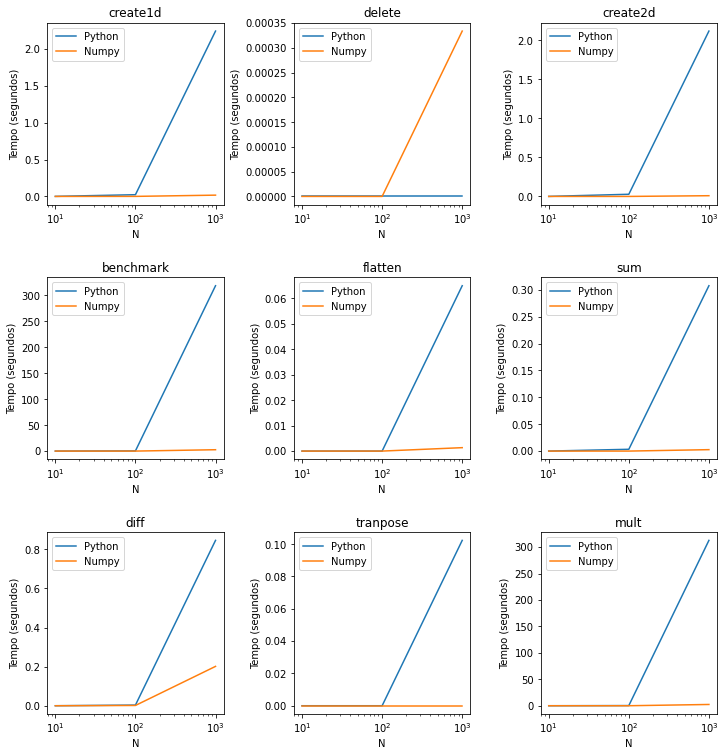

In [19]:
import matplotlib.pyplot as plt

operations = list(python_results.keys())

fig, axs = plt.subplots(3, 3, figsize=(12, 12)) 
fig.subplots_adjust(0.125, 0.1, 0.9, 0.9, 0.4, 0.4)

for op, ax in zip(operations, axs.ravel()):
    ax.plot(N, python_results[op], label="Python")
    ax.plot(N, numpy_results[op], label="Numpy")
    ax.set(xlabel='N', ylabel='Tempo (segundos)')
    ax.set_title(op)
    ax.set_xscale('log')
    ax.legend()
plt.show()



Foi executado a função benchmark do Python e do Numpy 3 vezes, e foi tirado a média do tempo gasto para a execução das funções. O tamanho da entrada (N) foi variado aumentando a ordem de grandeza, [10, 100, 1000], com N = 1000 (ou seja, 1000*1000 = 1,000,000 elementos na matriz) a função benchmark do Python sem Numpy levou mais de 250 segundos para terminar a execução.

Como podemos notar a partir da observação dos gráficos, em todas as operações com matrizes a implementação com o Numpy sobressaiu em cima do Python sem Numpy. A medida que aumenta a ordem de grandeza do tamanho da matriz a diferença de tempo entre as duas implementações é ainda maior, mostrando a vantagem em utilizar as ferramentas disponibilizadas pela biblioteca Numpy para manipulação de vetores e matrizes de tamanho consideravelmente grande (ordem de grandeza igual ou maior que 10^2), que é o caso da maioria dos dados alvos dos estudos em ciência de dados, área da computação esta que utiliza com extrema frequência vetores e matrizes, uma vez que a velocidade de processamento e a disponibilização recursos poderosos são muito almejados no data science.

Mas porque Numpy é mais rápido que as listas do Python? Os arrays Numpy são armazenados em um local contínuo na memória, ao contrário das listas, de modo que os processos podem acessá-los e manipulá-los de maneira muito eficiente. Esse comportamento é denominado localidade de referência em informática. Sendo esta a principal razão pela qual o Numpy é mais rápido do que as listas nativas do Python. Também é otimizado para funcionar com as arquiteturas de CPU mais recentes.

Para compararmos as duas abordagens quanto ao consumo de memória, podemos utilizar a função memory_usage da biblioteca memory_profiler para obtermos o uso de memória do sistema a cada segundo de execução da função passada como parâmetro. Abaixo, vamos analisar o pico de uso de memória para cada implementação, variando o tamanho de N em 10, 100 e 1000:

In [28]:
from memory_profiler import memory_usage

mem_usage = memory_usage((python_benchmark, [10]))
print('Pico de uso de memória durante execução da função Python: %s' % max(mem_usage))

mem_usage = memory_usage((numpy_benchmark, [10]))
print('Pico de uso de memória durante execução da função Numpy: %s' % max(mem_usage))

Pico de uso de memória durante execução da função Python: 117.98046875
Pico de uso de memória durante execução da função Numpy: 117.984375


In [27]:
from memory_profiler import memory_usage

mem_usage = memory_usage((python_benchmark, [100]))
print('Pico de uso de memória durante execução da função Python: %s' % max(mem_usage))

mem_usage = memory_usage((numpy_benchmark, [100]))
print('Pico de uso de memória durante execução da função Numpy: %s' % max(mem_usage))

Pico de uso de memória durante execução da função Python: 119.74609375
Pico de uso de memória durante execução da função Numpy: 117.9765625


In [23]:
from memory_profiler import memory_usage

mem_usage = memory_usage((python_benchmark, [1000]))
print('Pico de uso de memória durante execução da função Python: %s' % max(mem_usage))

mem_usage = memory_usage((numpy_benchmark, [1000]))
print('Pico de uso de memória durante execução da função Numpy: %s' % max(mem_usage))

Pico de uso de memória durante execução da função Python: 384.3046875
Pico de uso de memória durante execução da função Numpy: 148.296875


Bom, percebemos que para N=10 e N=100 o consumo de memória foi semelhante para as duas implementações, porém para N=100 a implementação com Numpy consumiu menos da metade do que foi consumido pelo Python puro.

Podemos analisar o consumo de memória de uma outra forma também, considerando somente o array que está sendo manipulado, não considerando outras atribuições e operações auxiliares. Isto é, podemos criar um array aleatório com as listas do Python puro e um com o Numpy, e seguida, calcular o tamanho em bytes destes arrays. Vamos fazer isso a seguir:

In [91]:
import sys

size_array = []
for i in range(5):
  size_array.append(10**i)

sizeof_py_array = []
sizeof_np_array = []
for size in size_array:
  py_array = python_createRandom2DArray(size)
  np_array = numpy_createRandom2DArray(size)
  sizeof_py_array.append(sys.getsizeof(py_array[0])*len(py_array))
  sizeof_np_array.append(np_array.itemsize*np_array.size)

print(sizeof_py_array)
print(sizeof_np_array)


[88, 1840, 90400, 9016000, 876160000]
[4, 400, 40000, 4000000, 400000000]


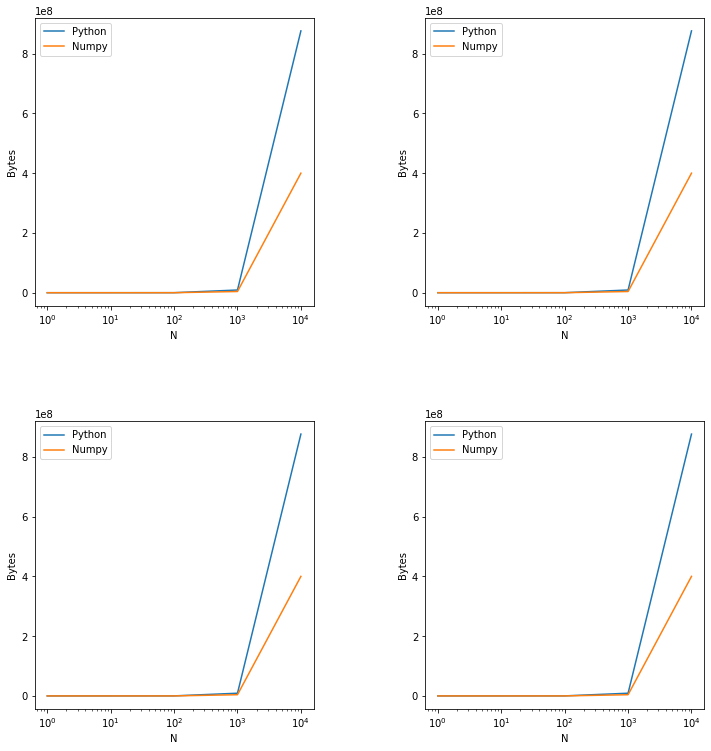

In [93]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12)) 
fig.subplots_adjust(0.125, 0.1, 0.9, 0.9, 0.4, 0.4)

for n, ax in zip(size_array, axs.ravel()):
    ax.plot(size_array, sizeof_py_array, label="Python")
    ax.plot(size_array, sizeof_np_array, label="Numpy")
    ax.set(xlabel='N', ylabel='Bytes')
    ax.set_xscale('log')
    ax.legend()
plt.show()

Como podemos observar, os arrays do Numpy consomem significativamente menos memória em comparação com as listas python a medida que N aumenta. É possível inclusive especificar o tipo dos dados contidos no array, permitindo um consumo ainda menor de memória. Por exemplo:

In [92]:
# Elementos limitados a 1 byte
numpy_arr = np.array([1,2,3,4,5,6], dtype = np.int8)
sizeof_numpy_arr = numpy_arr.itemsize * numpy_arr.size  
print(sizeof_numpy_arr)

# Elementos limitados a 2 byte
numpy_arr = np.array([1,2,3,4,5,6], dtype = np.int16)
sizeof_numpy_arr = numpy_arr.itemsize * numpy_arr.size 
print(sizeof_numpy_arr)

6
12


O Numpy por padrão considera 8 bytes para inteiros, no entanto, podemos especificar o tipos de dados que iremos trabalhar na matriz caso tenhamos um conhecimento do valor do maior elemento do conjunto de dados. Por exemplo, podemos usar um inteiro de 1 byte para armazenar números até 255 e um inteiro de 2 bytes para números até 65535.

## Considerações finais

Concluimos aqui a nossa comparação entre as listas nativas do Python e os arrays multidimensionais disponibilizados pela poderosa biblioteca Numpy. Como consideração final, podemos afirmar que a biblioteca Numpy é extremamente vantajosa quando se pretende trabalhar com um grande volume de dados, dado o rápido tempo de processamento quando comparado as listas nativas da linguagem e o baixo consumo de memória quando também comparado com as listas do Python. Além de oferecer diversos recursos extras que facilitam a escrita e a produtividade do desenvolvedor/analista que não estão presentes nativamente no Python.